# Coronavirus disease (COVID-19) Pandemic

###### Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

#####  I did my best to follow a comprehensive, but not exhaustive, analysis of the data. I'm far from reporting a rigorous study in this kernel, but I hope that it can be useful for the community, so I'm sharing how I applied some of those data analysis principles to this problem. I will also be doing visualizations using plotly, matplotlib and seaborn from which we are gonna get valuable insights.

#### The main purpose of creating this notebook is to visualize the pandemic covid-19 and it's effects. It can be used by resource persons to get valuables insights and to build upon it.

####  Feel free to contact me, if you have any doubts in LinkedIn: [Suraj RP](https://www.linkedin.com/in/suraj-rp/)


##### What we are doing in this kernel is:
##### 1) Basic exploratory data analysis
##### 2) Univariable study: We'll just focus on the dependent variables i.e. ('Confirmed' ,'Deaths','Active') and try to know a little bit more about it.
##### 3) Multivariate study: We'll try to understand how the dependent variable and independent variables relate. 
##### 4) To show vivid examples of Plotly, Seaborn and Matplotlib visualization libraries.

## Please do upvote this notebook if you find it useful :)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context("paper")
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "seaborn"
from plotly.subplots import make_subplots

from pathlib import Path
data_dir = Path('../input/images')

import os
os.listdir(data_dir)

In [ ]:
Image(filename=data_dir/'cov_8.PNG')

##### Source:  [John Hopkins University and Medicine](https://coronavirus.jhu.edu/map.html)

##### For more information :  [WHO](https://www.who.int/health-topics/coronavirus#tab=tab_1)

##### Let's start by importing the data

##### The cleaned data from [COVID-19 Complete Dataset (Updated every 24hrs)](https://www.kaggle.com/imdevskp/corona-virus-report) is used for visualizations.

In [ ]:
df = pd.read_csv("../input/corona-virus-report/covid_19_clean_complete.csv", parse_dates = ['Date'])
df.head()

In [ ]:
df.columns

## 1. Details about the columns:

In [ ]:
df.info()

##### There are 5 numerical columns ('Lat','Long','Confirmed','Deaths','Recovered') , 2 catagorical columns ('Province/State' & 'Country/Region' ) and 1 datetime column ('Date')

In [ ]:
df.describe(include = 'object')

##### Going in detail, there are 185 unique countries and 80 unique province/states enlisted in the dataset

In [ ]:
a = df.Date.value_counts().sort_index()
print('The first date is:',a.index[0])
print('The last date is:',a.index[-1])

###### The dataset starts from 22nd January to 27th July 2020

In [ ]:
df.isnull().sum()

##### Now let's clean the data

In [ ]:
#Renaming the coulmns for easy usage
df.rename(columns={'Date': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Lat':'lat', 'Long':'long',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)

# Active Case = confirmed - deaths - recovered
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

# 2. Visualization using Plotly:

##### Data visualization is one of the core skills in data science. In order to start building useful models, we need to understand the underlying dataset. You will never be an expert on the data you are working with, and will always need to explore the variables in great depth before you can move on to building a model or doing something else with the data. Effective data visualization is the most important tool in your arsenal for getting this done, and hence an critical skill for you to master.

##### For this I'm gonna use [Plotly Python Open Source Graphing Library](https://plotly.com/python/). Plotly is another great Python visualization tool that’s capable of handling geographical, scientific, statistical, and financial data.  Plotly has several advantages over matplotlib. One of the main advantages is that only a few lines of codes are necessary to create aesthetically pleasing, interactive plots. The interactivity also offers a number of advantages over static matplotlib plots:
##### 1) Saves time when initially exploring your dataset
##### 2) Makes it easy to modify and export your plot
##### 3) Offers a more ornate visualization, which is well-suited for conveying the important insights hidden within your dataset.

### I have tried to use different types of plotly map visualizations to show examples of it.

## A. Worldwide spread analysis:

In [ ]:
df1 = df
df1['date'] = pd.to_datetime(df1['date'])
df1['date'] = df1['date'].dt.strftime('%m/%d/%Y')
df1 = df1.fillna('-')
fig = px.density_mapbox(df1, lat='lat', lon='long', z='confirmed', radius=20,zoom=1, hover_data=["country",'state',"confirmed"],
                        mapbox_style="carto-positron", animation_frame = 'date', range_color= [0, 10000],title='Spread of Covid-19')
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

#### Here are my observations :
##### 1) The spread of the virus was initially slow and the numbers were also less.
##### 2) But as time progresses, the spread is massive and the numbers have gone haywire.
##### 3) If protective measures are not taken, the worse is yet to come!

## B. Active cases around the world:

In [ ]:
top = df[df['date'] == df['date'].max()]
world = top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
world.head()

In [ ]:
figure = px.choropleth(world, locations="country", 
                    locationmode='country names', color="active", 
                    hover_name="country", range_color=[1,500000], 
                    color_continuous_scale="Peach", 
                    title='Countries with Active Cases')
figure.show()

#### Here are my observations :
##### 1) Most of the countries have crossed the 10000 barriers, while some of them can control the spread of the virus and have kept it under 1000.
##### 2) China is one of the only nations which has been decreasing the active number of cases
##### 3) But in some other nations like the US, Italy, Spain, France, the number of active cases is rising rapidly.

## C. Recovered count around the world:

In [ ]:
fig = px.scatter_mapbox(top, lat="lat", lon="long", hover_name="country", hover_data=["country","recovered"],
                        color_discrete_sequence=["fuchsia"], zoom=0.5, height=300,title='Recovered count of each country' )
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

## D. Death count around the world:

In [ ]:
world['size'] = world['deaths'].pow(0.2)
fig = px.scatter_geo(world, locations="country",locationmode='country names', color="deaths",
                     hover_name="country", size="size",hover_data = ['country','deaths'],
                     projection="natural earth",title='Death count of each country')
fig.show()

# 3. Visualization using Seaborn:

##### Matplotlib is quite possibly the simplest way to plot data in Python. It is similar to plotting in MATLAB, allowing users full control over fonts, line styles, colors, and axes properties. This allows for complete customization and fine control over the aesthetics of each plot, albeit with a lot of additional lines of code. 

##### For more information :  [Seaborn](http://seaborn.pydata.org/index.html) , [Matplotlib](https://matplotlib.org/)

## A. Confirmed Cases Over Time

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel("Dates",fontsize = 30)
plt.ylabel('Total cases',fontsize = 30)
plt.title("Worldwide Confirmed Cases Over Time" , fontsize = 30)
total_cases = df.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])


ax = sns.pointplot( x = total_cases.date.dt.week ,y = total_cases.confirmed , color = 'r')
ax.set(xlabel='Weeks', ylabel='Total cases')

#### Here are my observations :
##### 1) The slope of the line, in the beginning, was gradually ascending and at recent times, it's very high!
##### 2) At the current rate, there are no signs of a drop in the total cases.
##### 3) If protective measures are not taken, there's no wonder the slope reaches to max

## B. Top 20 countries having most confirmed cases

In [ ]:
top = df[df['date'] == df['date'].max()]
top_casualities = top.groupby(by = 'country')['confirmed'].sum().sort_values(ascending = False).head(20).reset_index()
top_casualities

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most confirmed cases" , fontsize = 30)
ax = sns.barplot(x = top_casualities.confirmed, y = top_casualities.country)
for i, (value, name) in enumerate(zip(top_casualities.confirmed,top_casualities.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

#### Here are my observations :
##### 1) China was the place of origin, but now they is o trace of them in Top 20.
##### 2) The number of confirmed cases are on a high in the US, Brazil, India, and Russia.
##### 3) But the number of cases in the third world countries is less.

## C. Top 20 countries having most active cases

In [ ]:
top_actives = top.groupby(by = 'country')['active'].sum().sort_values(ascending = False).head(20).reset_index()
top_actives

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most active cases" , fontsize = 30)
ax = sns.barplot(x = top_actives.active, y = top_actives.country)
for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

#### Here are my observations :
##### 1) As the covid-19 testing is increasing, The active number of cases is also increasing day by day.
##### 2) The number of active cases is on a high in the US, Brazil, India, and .
##### 3) In comparison with the total population, Italy, Spain, Germany and France are the worst-hit nation. 

## D. Top 20 countries having most deaths

In [ ]:
top_deaths = top.groupby(by = 'country')['deaths'].sum().sort_values(ascending = False).head(20).reset_index()
top_deaths

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most deaths" , fontsize = 30)
ax = sns.barplot(x = top_deaths.deaths, y = top_deaths.country)
for i, (value, name) in enumerate(zip(top_deaths.deaths,top_deaths.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

#### Here are my observations :
##### 1) Even though Italy has the 2nd best healthcare system according to the WHO, they haven't been able to tackle the pandemic problem effectively.
##### 2) China even having so many confirmed cases was able to decrease the number of deaths
##### 3) The number of deaths is also on a rise, especially in Italy, Spain, and Iran.

## E. Top 20 countries having most recovered cases

In [ ]:
top_recovered = top.groupby(by = 'country')['recovered'].sum().sort_values(ascending = False).head(20).reset_index()
top_recovered

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most recovered cases" , fontsize = 30)
ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.country)
for i, (value, name) in enumerate(zip(top_recovered.recovered,top_recovered.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

#### Here are my observations :
##### 1) By far Brazil is leading in the number of recoveries even though having a huge number of confirmed cases
##### 2) Italy, Iran, and Spain are also doing a good job.
##### 3) We have to pump up these numbers for a promising future!

## F. Top 20 countries having the worst mortality and best recovery rate:

In [ ]:
rate = top.groupby(by = 'country')['recovered','confirmed','deaths'].sum().reset_index()
rate['recovery percentage'] =  round(((rate['recovered']) / (rate['confirmed'])) * 100 , 2)
rate['death percentage'] =  round(((rate['deaths']) / (rate['confirmed'])) * 100 , 2)
rate.head()

In [ ]:
mortality = rate.groupby(by = 'country')['death percentage'].sum().sort_values(ascending = False).head(20).reset_index()
mortality

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most mortality rate" , fontsize = 30)
ax = sns.barplot(x = mortality['death percentage'], y = mortality.country)
for i, (value, name) in enumerate(zip(mortality['death percentage'], mortality.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Mortality Rate in percentage', ylabel='Country')

##### Here are my observations:
##### 1) Angola, Nicaragua and the Gambia have the highest mortality rate because there is very less number of the confirmed cases, yet there more deaths in them.
##### 2) The majority of the countries which top the list have a bad healthcare system and they require help from developed countries.
##### 3) But when a minimum of 100 confirmed cases is considered, San Marino, Iraq and Indonesia top the charts
##### 4) When more than 10000 confirmed cases are considered, Italy is at the top and this percentage rate is very scary. It seems that they have lost control over the spread of covid-19 and cannot contain it.

In [ ]:
recovery = rate.groupby(by = 'country')['recovery percentage'].sum().sort_values(ascending = False).head(20).reset_index()
recovery

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most recovery rate" , fontsize = 30)
ax = sns.barplot(x = recovery['recovery percentage'], y = recovery.country)
for i, (value, name) in enumerate(zip(recovery['recovery percentage'], recovery.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Recovery Rate in percentage', ylabel='Country')

##### Here are my observations:
##### 1) China tops the chart and they are doing a remarkable job with a recovery rate of 90%. It tells us that in every 100 infected people, 90 people have recovered from the covid-19 virus.
##### 2) The Cruise ship is unusual here as the outbreak was a while ago and it explains the high recovery rate.
##### 3) South Korea, Bahrain and Iran are also doing a fantastic job treating the covid-19 virus.
##### 4) Surprisingly the Maldives have recovered 8 out of their 13 confirmed cases.
##### 5) Saint Vincent and the Grenadines has 100% because they have recovered 1 case out of 1 confirmed case.

# 3. Analysis of most affected countries

##### I will select the most affected countries for further analysis and visualization i.e China, US, Italy.
##### I will also select India so that I can analyze and foresee the covid - 19 problem of our country.
##### The analysis and visualizations of the covid cases in each country will start from the day of their first covid-19 case. From this, we can get valuable insights like the rate of growth of the covid-19 virus.

##### The first case of China recorded in this dataset is 22nd January,2020 . So let's consider it as day 1 and make the required changes in the dataset.

In [ ]:
china =  df[df.country == 'China']
china = china.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
china['date'] = china['date'].apply(lambda x : datetime.strptime(x, "%m/%d/%Y"))
china.head()

##### The first case recorded in US is on 24th February,2020. So let's consider it as day 1 and make the required changes in the dataset

In [ ]:
us =  df[df.country == 'US']
us = us.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index', axis = 1)
us['date'] = us['date'].apply(lambda x : datetime.strptime(x, "%m/%d/%Y"))
us.head()

##### The first case recorded in Italy is on 31st January. So let's consider it as day 1 and make the required changes in the dataset.

In [ ]:
italy =  df[df.country == 'Italy']
italy = italy.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop('index', axis = 1)
italy['date'] = italy['date'].apply(lambda x : datetime.strptime(x, "%m/%d/%Y"))
italy.head()

##### The first case recorded in India is on 30th January. So let's consider it as day 1 and make the required changes in the dataset.

In [ ]:
india =  df[df.country == 'India']
india = india.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
india = india.iloc[8:].reset_index().drop('index', axis = 1)
india['date'] = india['date'].apply(lambda x : datetime.strptime(x, "%m/%d/%Y"))
india.tail()

## A. Comparision on no. of confirmed cases till date:

In [ ]:
plt.figure(figsize=(15,30))
a = plt.subplot(4, 1, 1)
sns.pointplot(china.date.dt.week ,china.confirmed)
plt.title("China's Confirmed Cases Over Time" , fontsize = 25)
plt.ylabel('Total cases', fontsize = 15)
plt.xlabel('No. of Weeks', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.date.dt.week ,us.confirmed)
plt.title("US's Confirmed Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Weeks', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.date.dt.week ,italy.confirmed)
plt.title("Italy's Confirmed Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Weeks', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 4)
sns.pointplot(india.date.dt.week ,india.confirmed)
plt.title("India's Confirmed Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Weeks', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)

##### Here are my observations:
##### 1) From Day 0 to Day 15, China has very a high slope as the covid-19 originated there. Whereas in other countries, the slope is quite low.
##### 2) After day 15, there was an incremental rise in the number of cases in the US, whereas in Italy and India it is still less.
##### 3) But after that, there is a high surge in no. of cases in US and Italy
##### 4) India seems to be doing a great job in controlling the spread of the virus and keep the count of cases less. But lately, there has been a rise in the number of cases!

## B. Comparision on no. of active cases now:

In [ ]:
plt.figure(figsize=(15,30))
plt.subplot(4, 1, 1)
sns.pointplot(china.index ,china.active, color = 'r')
plt.title("China's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.index ,us.active, color = 'r')
plt.title("US's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.index ,italy.active, color = 'r')
plt.title("Italy's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 4)
sns.pointplot(india.index ,india.active, color = 'r')
plt.title("India's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)

##### Here are my observations:
##### 1) It's showing the same insights as to the confirmed cases
##### 2) But the only difference is the no.of active cases in China has been incrementally decreasing from day 30 as there a few deaths and a lot of recovered people and they have also prevented the spread of the covid-19 virus. 
##### 3) The no. of active cases in the US and Italy is rising detrimentally.
##### 4) Even though the slope of India is high but the rate of increase is less.

## C. Comparision on no. of death cases till date:

In [ ]:
plt.figure(figsize=(15,30))
plt.subplot(4, 1, 1)
sns.pointplot(china.index ,china.deaths, color = 'g')
plt.title("China's Deaths Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.index ,us.deaths, color = 'g')
plt.title("US's Deaths Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.index ,italy.deaths, color = 'g')
plt.title("Italy's Deaths Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)


plt.subplot(4, 1, 4)
sns.pointplot(india.index ,india.deaths, color = 'g')
plt.title("India's Deaths Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)

##### Here are my observations:
##### 1) Even though China was the first to get the virus, they were able to minimize the no. of deaths considerably after Day 30.
##### 2) But lately there has been a huge surge in no. of deaths in Italy and it has also crossed the most no. of deaths in the world.
##### 3) There is also a slight increase in no. of deaths in the US.
##### 4) India on the other hand considerably have very less no. of deaths.

## D. Comparision on no. of recovered cases till date:

In [ ]:
plt.figure(figsize=(15,30))
plt.subplot(4, 1, 1)
sns.pointplot(china.index ,china.recovered, color = 'orange')
plt.title("China's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.index ,us.recovered, color = 'orange')
plt.title("US's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.index ,italy.recovered, color = 'orange')
plt.title("Italy's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 4)
sns.pointplot(india.index ,india.recovered, color = 'orange')
plt.title("India's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)

##### Here are my observations:
##### 1) Compared to the number of confirmed cases, China has done an incredible job in recovering so many patients from the covid-19 pandemic.
##### 2) Italy is also trying to increase the number of recoveries, but lately the number of deaths has gone through the roof.
##### 3) Recoveries of the US and India are also less. 

# Remidial measures:

#### Our aim will be to keep the epidemic curve as flat as possible, keeping the number of cases reported each day as low as we can. If we can achieve that, it’ll mean we’ll be able to treat everyone who needs treating. We can all help with this by washing our hands regularly, avoiding touching our mouth, nose, and eyes, and staying away from other people when we are sick. This also means calling ahead if you feel sick and want to go to the doctor or hospital. The last thing we need is loads of our healthcare workers in isolation because they’ve been exposed to Covid-19. 

<img src="https://thespinoff.co.nz/wp-content/uploads/2020/03/Covid-19-curves-graphic-social-v3.gif">

<img src="https://thespinoff.co.nz/wp-content/uploads/2020/03/Covid-19-curves-graphic2-stopthespread-v2.gif">

# Help stop coronavirus by following these simple 5 steps:

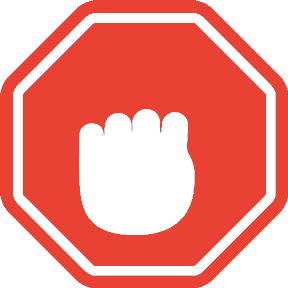

### 1) HANDS : Wash them often
###  2) ELBOW : Cough into it
### 3) FACE : Don't touch it
### 4) SPACE : Keep safe distance
### 5) HOME : Stay if you can

#### For more info:  [WHO: Advice for public](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/advice-for-public)

# Conclusion:

## In this time of great distress, it is very important to do what we can to help the human community to fight this virus. If you can be of any assitance in this war against our biggest enemy, then please do your part!

## Prepare, don’t panic. Look after the vulnerable people in your community. We’re all in this together. And we are in it for the long haul.

## "We might have lost the battle, but we'll surely win the war"

##### For more information :  [Suraj RP](https://www.linkedin.com/in/suraj-rp/)
#### Email ID: surajrp32@gmail.com